In [1]:
import os
import pandas as pd
import numpy as np

#get rid of future warnings with seaborn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
# look at the file name
names = os.listdir('input');
names

['.ipynb_checkpoints', 'Bank_Personal_Loan_Modelling.xlsx', 'random_file.png']

In [3]:
#get the path to the file
path = 'input/' + names[1]
path

'input/Bank_Personal_Loan_Modelling.xlsx'

In [4]:
master = pd.read_excel(path, 'Data')

In [5]:
master.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Variables definition


> - **ID** - Customer ID 
> - **Age** - Customer's age in completed years 
> - **Experience** - #years of professional experience 
> - **Income** - Annual income of the customer - in thousands usd 
> - **ZIPCode** - Home Address ZIP code. 
> - **Family** - Family size of the customer 
> - **CCAvg** - Avg. spending on credit cards per month - in thousands usd 
> - **Education** - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
> - **Mortgage** - Value of house mortgage if any - in thousands usd  
> - **Personal Loan**  - Did this customer accept the personal loan offered in the last campaign? 
> - **Securities Account** - Does the customer have a securities account with the bank? 
> - **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank? 
> - **Online** - Does the customer use internet banking facilities? 
> - **CreditCard** - Does the customer uses a credit card issued by UniversalBank?

In [6]:
#for more convinient - reposition "Personal Loan"  column since it is our target column for research
a = master['Personal Loan']
master.drop('Personal Loan', axis = 1, inplace = True)
master['Personal Loan'] = a

In [7]:
master.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


# <br><br>

## Assess Data

In [8]:
df = master.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

> **Observation**
> - No null values
> - No missing values
> - Columns "ID", "ZIP Code" are categorical nominal variables. Should be in 'str' type

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


> **Observation**
> - Column "Experience" has some negative value. Need to fix
> - Binary variables "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account" has clean data
> - Ordinary Cat variables "Family" and "Education" are clean too  

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

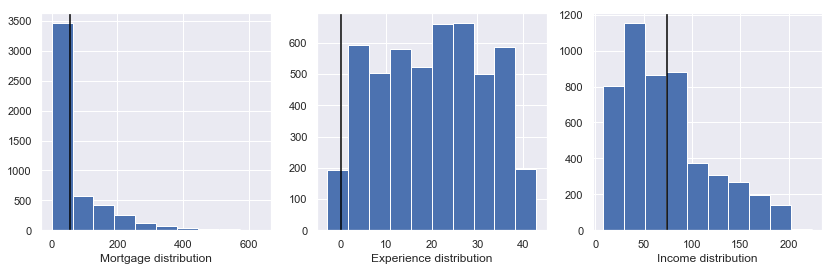

In [12]:
#cols = ['Experience', 'Mortgage']
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(df.Mortgage.mean(), color = "black")

ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");

### Summary Assess Data
> - Columns "ID", "ZIP Code", 'Family', 'Education' are nominal variables. Should be in 'str' type
> - Column "Experience" has some negative value. Need to fix

No bad tidiness issues


# <br>

## Clean Data

#### Define

Columns "ID", "ZIP Code" are nominal variables

#### Code

In [13]:
df[['ID','ZIP Code']] = df[['ID','ZIP Code']].astype('str')

#### Test

In [14]:

df[['ID', 'ZIP Code']].dtypes

ID          object
ZIP Code    object
dtype: object

# <br>

#### Define

Column "Experience" has some negative value

#### Code

In [15]:
#check the ammount of negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

##### Lets find the quantitive variable with strong correlation with 'Experience'

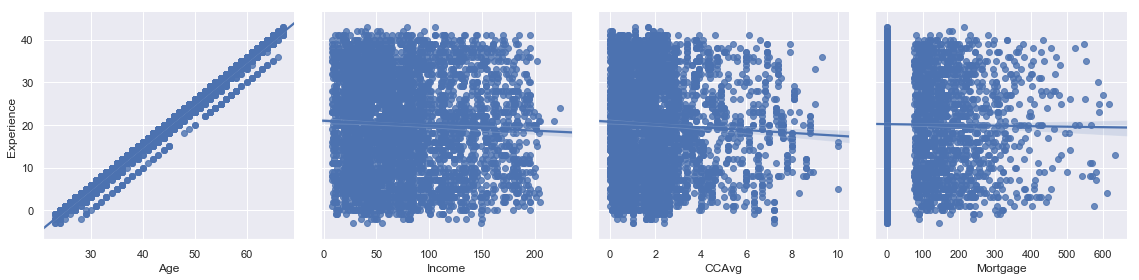

In [16]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

'Age' has a very strong correlation with 'Experience

Get the subset of 'Age' data with negative values in 'Experience

In [17]:
df[df['Experience'] < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

**Observation:**

The subset of each age with negative values in 'Experience' is definitely small. 

**Decision:**
We can replace each negative 'Experience' value with the mean of positive 'Experience' value associated with the particular 'Age' value

<br>
Get a list of 'Age' values where we found some negative values in 'Experience'

In [18]:
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

Get indexes of negative values in 'Experience'

In [19]:
indexes = df[df['Experience'] < 0].index.tolist()

Replace nagative 'Experience' values with the means

In [20]:
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

#### Test

In [21]:
df[df['Experience'] < 0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [22]:
df.Experience.describe()

count    5000.000000
mean       20.135743
std        11.413140
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

# <br>
All Data is clean and we can start Analysis
<br> 

# Analysis

### Questions

> - Is there some correlation between personal characteristics and the fact that person obtained Personal Loan (Loan Fact)? If so:
> - What are those Main Characteristics that has a higher correlation with Loan Fact and what the strength of correlation?
> - What the Segments of Main Characteristics, that has a higher ratio of conversion customers into the Personal Loaners?
> - What is the sample of Data with persons from Main Segments.
> - What is the probability of person obtain Personal Loan if his/her characteristics come from Main Segments?

## Exploratory data analysis

###  Is there some correlation between personal characteristics and the fact that person obtained Personal Loan?

Let's check what the values or group of values of each variable lies inside group that have 'Personal Loan' and don't have that.

Since we found strong correlation between 'Age' and 'Experience' we decided to exclud 'Experience' from analysis steps to avoid multicollinearity.

#### QUANTATIVE VARIABLES

['Age', 'Income', 'CCAvg', 'Mortgage']

In [23]:
quant_df = df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].copy()

#### Correlation Table

In [24]:
quant_df.corr()

,Personal Loan,Age,Income,CCAvg,Mortgage
Personal Loan,1.000000,-0.007726,0.502462,0.366891,0.142095
Age,-0.007726,1.000000,-0.055269,-0.052030,-0.012539
Income,0.502462,-0.055269,1.000000,0.645993,0.206806
CCAvg,0.366891,-0.052030,0.645993,1.000000,0.109909
Mortgage,0.142095,-0.012539,0.206806,0.109909,1.000000


#### Heat map

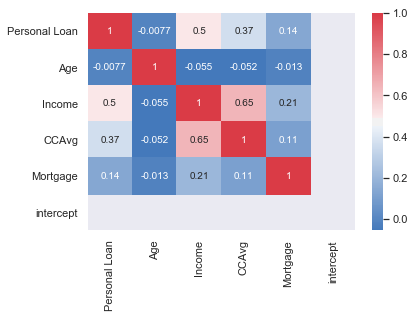

In [154]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(quant_df.corr(), cmap = cmap, annot = True);

In [26]:
# get correlation coefficients for 'Personal Loan' and exclude it's data from series
quant_df.corr()['Personal Loan'][1:]

Age        -0.007726
Income      0.502462
CCAvg       0.366891
Mortgage    0.142095
Name: Personal Loan, dtype: float64

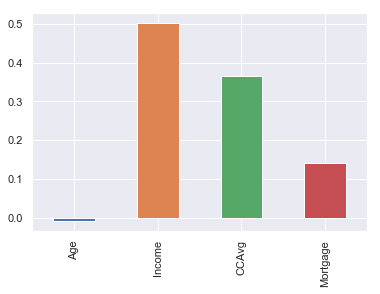

In [27]:
quant_df.corr()['Personal Loan'][1:].plot.bar();

**'Age'** and **'Mortgage'** both has very low cor.coef with Personal Loan. We may say that only **'Income'** and **'CCAvg**' has correlation with 'Personal Loan'

Let's check our confidense about this statment with logistic regression model:

In [28]:
import statsmodels.api as sm

In [29]:
quant_df['intercept'] = 1
log_mod = sm.Logit(quant_df['Personal Loan'], quant_df[['intercept', 'Age', 'Income', 'CCAvg', 'Mortgage']]).fit()

Optimization terminated successfully.
         Current function value: 0.200574
         Iterations 8


In [30]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:                  0.3657
Time:                        16:47:26   Log-Likelihood:                -1002.9
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                4.743e-249
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.5144      0.308    -21.155      0.000      -7.118      -5.911
Age            0.0080      0.005      1.550      0.121      -0.002       0.018
Income         0.0351      0.002     22.313      0.000       0.032       0.038
CCAvg          0.0688      0.029      2.409      0.016       0.013       0.125
Mortgage       0.0007      0.000      1.757      0.079   -8.49e-05       0.002
==============================================================================
"""

#### The bar chart of P-Values distribution and threshold line 

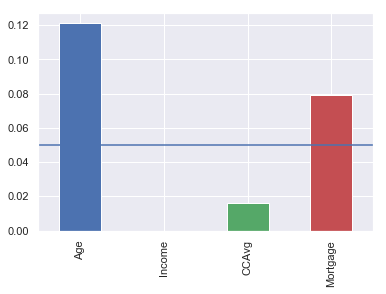

In [31]:
# exclude 'intercept'
log_mod.pvalues[1:5].plot.bar()
plt.axhline(y = 0.05);

**We can say with confidence** that 'Income' and 'CCAvg' both has statisticaly significant correlation with 'Personal Loan', since  their p-value in logistic regression < 0.05

#### The bar chart of coefficient distribution 

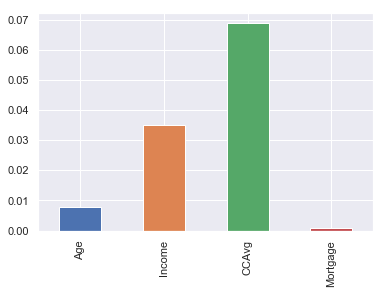

In [32]:
# exclude 'intercept'
log_mod.params[1:5].plot.bar();

**'CCAvg'** has strongest correlation with 'Personal Loan'

#### Filter columns with P-values less then 0.05 and store variables and it's coefficients into the dictionary

In [33]:
quant_df_main = {}
for i in log_mod.params[1:5].to_dict().keys():
    if log_mod.pvalues[i] < 0.05:
        quant_df_main[i] = log_mod.params[i]
    else:
        continue

In [34]:
quant_df_main

{'Income': 0.035086794726785976, 'CCAvg': 0.06879405526062024}

#### Compute the odds

In [35]:
quant_df_main_odds = {k : np.exp(v) for k, v in quant_df_main.items()}

In [36]:
quant_df_main_odds

{'Income': 1.0357095990302452, 'CCAvg': 1.0712155752174697}

### Conclusion:

'Personal Loan' has statisticaly significant correlation with:

> -  'Income' : coef = 0.03508
> -  'CCAvg' : coef = 0.06879

Both variables are positively associated with 'Personal Loan'. As soon as both have one unit as $1000 we may say the following:

> - **For each $1000 increase in 'Income'** we expect the odds to sell Personal Loan to increase by 3.57%, holding everything else constant

> - **For each $1000 increase in 'CCAvg'** we expect the odds to sell Personal Loan to increase by 7.12%, holding everything else constant

<br>

### CATEGORICAL VARIABLES

'ZIP Code', 'Family', 'Education'

'Family' and 'Education' are ordinal categorical variables so we may apply logistic regression direct to them. 'ZIP Code' is nominal, so we need to build dummy variables to check the correlation existence

In [37]:
cat_df = df[['ZIP Code', 'Family', 'Education', 'Personal Loan']].copy()

<br>

### 'Family' and  'Education'

In [38]:
cat_df.corr()

,Family,Education,Personal Loan
Family,1.000000,0.064929,0.061367
Education,0.064929,1.000000,0.136722
Personal Loan,0.061367,0.136722,1.000000


In [39]:
cat_df.corr()['Personal Loan'][0:2]

Family       0.061367
Education    0.136722
Name: Personal Loan, dtype: float64

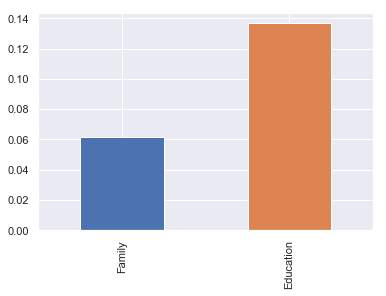

In [40]:
cat_df.corr()['Personal Loan'][0:2].plot.bar();

**'Family'** and **'Education'** has low correlation with 'Personal Loan'

Let's check our confidence with logistic regretion


In [41]:
cat_df['intercept'] = 1
log_mod = sm.Logit(cat_df['Personal Loan'], cat_df[['intercept', 'Family', 'Education']]).fit()

Optimization terminated successfully.
         Current function value: 0.305406
         Iterations 7


In [42]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:                 0.03415
Time:                        16:47:28   Log-Likelihood:                -1527.0
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                 3.575e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.7670      0.175    -21.574      0.000      -4.109      -3.425
Family         0.1623      0.042      3.863      0.000       0.080       0.245
Education      0.5487      0.059      9.260      0.000       0.433       0.665
==============================================================================
"""

**We can say with confidence** that 'Family' and 'Education' both has statisticaly significant correlation with 'Personal Loan', since  their p-value in logistic regression < 0.05

#### The bar chart of coefficient distribution 

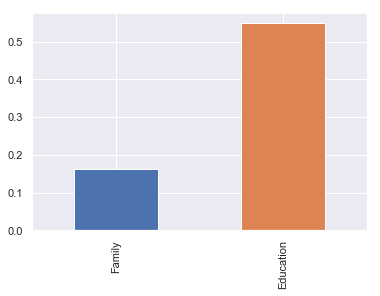

In [43]:
# exclude 'intercept'
log_mod.params[1:3].plot.bar();

**'Education'** has strongest correlation with 'Personal Loan'

#### Filter columns with P-values less then 0.05 and store variables and it's coefficients into the dictionary

In [44]:
cat_df_main = {}
for i in log_mod.params[1:3].to_dict().keys():
    if log_mod.pvalues[i] < 0.05:
        cat_df_main[i] = log_mod.params[i]
    else:
        continue

In [45]:
cat_df_main

{'Family': 0.1623178507480375, 'Education': 0.5487286631107698}

#### Compute the odds

In [46]:
cat_df_odds = {k : np.exp(v) for k, v in cat_df_main.items()}

In [47]:
cat_df_odds

{'Family': 1.1762340487826346, 'Education': 1.731050869500249}

### Conclusion:

'Personal Loan' has statisticaly significant correlation with:

> -  'Family' : coef = 0.16231
> -  'Education' : coef = 0.54873

Both variables are positively associated with 'Personal Loan'. We may say the following:

> - **For each unit increase in 'Family'** we expect the odds to sell Personal Loan to increase by 17.62%, holding everything else constant

> - **For each unit increase in 'Education'** we expect the odds to sell Personal Loan to increase by 73.11%, holding everything else constant

<br>

### 'ZIP Code'

In [48]:
cat_df.head()

,ZIP Code,Family,Education,Personal Loan,intercept
0,91107,4,1,0,1
1,90089,3,1,0,1
2,94720,1,1,0,1
3,94112,1,2,0,1
4,91330,4,2,0,1


In [49]:
zip_df = cat_df[['Personal Loan', 'intercept','ZIP Code']].copy()

In [50]:
zip_df.head(2)

,Personal Loan,intercept,ZIP Code
0,0,1,91107
1,0,1,90089


Lets check how we can group the 'Zip Code' values to minimize the number of dummies

In [51]:
zip_df['ZIP Code'].nunique()

467

In [52]:
zip_df['ZIP Code'].str[0:3].nunique()

57

In [53]:
zip_df['ZIP Code'].str[0:2].nunique()

7

In [54]:
zip_df['ZIP Code'].str[0:2].value_counts()

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: ZIP Code, dtype: int64

Guess this set is okay for the first view since we assume that the initial campaign of selling Personal Loans was evenly spreaded through all zip codes.

Let's get dummies...

In [55]:
dum_zip_df = zip_df.copy()

In [56]:
dum_zip_df['ZIP Code'] = dum_zip_df['ZIP Code'].str[0:2]

In [58]:
dum_zip_df.head(2)

,Personal Loan,intercept,ZIP Code
0,0,1,91
1,0,1,90


In [59]:
dum_zip_df = pd.get_dummies(dum_zip_df, prefix = "Z", drop_first = True)

In [60]:
dum_zip_df.head(2)

,Personal Loan,intercept,Z_91,Z_92,Z_93,Z_94,Z_95,Z_96
0,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0


Fit a logic model

In [111]:
#exclude 'Personal Loan' from independ vars
dum_zip_df_columns = dum_zip_df.columns.drop('Personal Loan').tolist()

In [112]:
log_mod = sm.Logit(dum_zip_df['Personal Loan'], dum_zip_df[dum_zip_df_columns]).fit()

Optimization terminated successfully.
         Current function value: 0.316143
         Iterations 6


In [113]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4993
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:               0.0001931
Time:                        17:30:36   Log-Likelihood:                -1580.7
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                    0.9962
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.2505      0.128    -17.521      0.000      -2.502      -1.999
Z_91           0.0234      0.191      0.122      0.903      -0.352       0.399
Z_92          -0.0019      0.168     -0.011      0.991      -0.331       0.328
Z_93           0.0875      0.206      0.425      0.671      -0.316       0.491
Z_94          -0.0182      0.157     -0.116      0.908      -0.325       0.289
Z_95           0.0327      0.174      0.187      0.851      -0.309       0.374
Z_96          -0.2618      0.614     -0.426      0.670      -1.465       0.941
==============================================================================
"""

**We can say with confidence** that any ZIP Code does not have statisticaly significant correlation with 'Personal Loan', since  their p-value in logistic regression > 0.05

# <br>

### BINARY VARIABLES

'Securities Account', 'CD Account', 'Online', 'Credit Card'

In [115]:
bin_df = df[['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']].copy()

In [116]:
bin_df.head()

,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [117]:
bin_df.corr()['Personal Loan']

Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

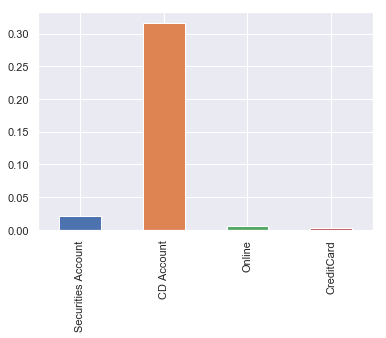

In [119]:
bin_df.corr()['Personal Loan'][1:].plot.bar();

**'CD Account'** - the only one variable with moderate correlation

<br>
Let's fit logistic regression

In [120]:
bin_df['intercept'] = 1
bin_df_colmn = bin_df.columns.drop('Personal Loan').tolist()
log_mod = sm.Logit(bin_df['Personal Loan'], bin_df[bin_df_colmn]).fit()

Optimization terminated successfully.
         Current function value: 0.273620
         Iterations 7


In [121]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:                  0.1347
Time:                        17:33:36   Log-Likelihood:                -1368.1
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                 7.257e-91
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Securities Account    -1.3318      0.201     -6.621      0.000      -1.726      -0.938
CD Account             3.8738      0.206     18.780      0.000       3.470       4.278
Online                -0.5107      0.111     -4.598      0.000      -0.728      -0.293
CreditCard            -1.1518      0.153     -7.508      0.000      -1.452      -0.851
intercept             -1.9991      0.081    -24.581      0.000      -2.159      -1.840
======================================================================================
"""

In [123]:
log_mod = sm.Logit(bin_df['Personal Loan'], bin_df[['intercept', 'CD Account']]).fit()

Optimization terminated successfully.
         Current function value: 0.285748
         Iterations 6


In [124]:
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Mar 2019   Pseudo R-squ.:                 0.09632
Time:                        17:35:26   Log-Likelihood:                -1428.7
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                 3.340e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.5508      0.056    -45.301      0.000      -2.661      -2.440
CD Account     2.4049      0.128     18.730      0.000       2.153       2.657
==============================================================================
"""

In [132]:
bin_odds = {'CD Account' : np.exp(log_mod.params[1])}

In [133]:
bin_odds

{'CD Account': 11.076978939724048}

### Conclusion:

'Personal Loan' has statisticaly significant **positive** correlation with only:

> -  'CD Account' : coef = 2.40

We may say the following:

> - **With customer been hold CD Account with The Bank** we expect the odds to sell Personal Loan to increase 10 times, holding everything else constant

<br><br>

## Summary Conclusion:

'Personal Loan' has statisticaly significant correlation with:

> -  'CD Account' : coef = 2.40 : odds = 11.07
> -  'Family' : coef = 0.16231 : odds = 1.176
> -  'Education' : coef = 0.54873 : odds = 1.731
> -  'Income' : coef = 0.03508 : odds = 1.036
> -  'CCAvg' : coef = 0.06879 : odds = 1.071

Both variables are positively associated with 'Personal Loan'. We may say the following:

> - **With customer been hold CD Account with The Bank** we expect the odds to sell Personal Loan to increase **10 times**, holding everything else constant

> - **For each unit increase in 'Family'** we expect the odds to sell Personal Loan to increase **by 17.62%**, holding everything else constant

> - **For each unit increase in 'Education'** we expect the odds to sell Personal Loan to increase **by 73.11%**, holding everything else constant

> - **For each $1000 increase in 'Income'** we expect the odds to sell Personal Loan to increase **by 3.57%**, holding everything else constant

> - **For each $1000 increase in 'CCAvg'** we expect the odds to sell Personal Loan to increase **by 7.12%**, holding everything else constant

As soon as we found that the 'Personal Loan' depends on FIVE main characteristics, let's subset our data frame and get a closer look at the data.

# <br>

#  Explanatory analysis

### What are those Main Characteristics that has a higher correlation with Loan Fact and what the strength of correlation?

In [127]:
exp_df = df[['Income', 'CCAvg', 'Family', 'Education', 'CD Account', 'Personal Loan']].copy()

In [128]:
exp_df.head(2)

,Income,CCAvg,Family,Education,CD Account,Personal Loan
0,49,1.6,4,1,0,0
1,34,1.5,3,1,0,0


In [151]:
exp_odds = dict(quant_df_main_odds,**cat_df_odds)
exp_odds.update(bin_odds)

In [152]:
exp_odds

{'Income': 1.0357095990302452,
 'CCAvg': 1.0712155752174697,
 'Family': 1.1762340487826346,
 'Education': 1.731050869500249,
 'CD Account': 11.076978939724048}

in short way...

In [ ]:
df.corr().abs().unstack().drop_duplicates().nlargest(4)

**Observation**
We have strong correlation between 'Age' and 'Experience' with r = 0.994010<br>

Decided to exclude 'Experience' from the Analysis
<br><br><br>

**Let's split data frame by type of variables** and then apply to each subset a logistic regression model. Its'  convenient way to track the path and keep an eye at every detail. 
Include 'Personal Loan' into each part as soon as it is our target variable

**Quantative variables** are as below:
> - Age
> - Income 
> - CCAvg 
> - Mortage 


**Categorical Variables are:**

> - ZIP COde
> - Family 
> - Education 


**Binary variables are:**

> - Securities Account
> - CD Account
> - Online 
> - Credit Card 

In [ ]:
df.columns

#### data frame for quantative vars

In [ ]:
num_df = df[['Age', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']].copy()

In [ ]:
num_df.head(1)

In [ ]:
#double check dtypes
num_df.dtypes

#### data frame for binary vars

In [ ]:
bin_df = df[['Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']].copy()

In [ ]:
bin_df.head(1)

In [ ]:
#double check dtypes
bin_df.dtypes

#### data frame for categorical vars

In [ ]:
cat_df = df[['ZIP Code', 'Family', 'Education', 'Personal Loan']].copy()

In [ ]:
cat_df.head(1)

In [ ]:
#double check dtypes
cat_df.dtypes

In [ ]:
#double check nuniques
cat_df.nunique()

>  Seems we will have a big deal with ZIP Code

### Let's create and fit logistic model 

In [ ]:
import statsmodels.api as sm

#### NUM_DF

In [ ]:
num_df.columns

In [ ]:
num_df['intercept'] = 1

In [ ]:
#exclude column "Personal Loan" from independent vars
num_df_columns = num_df.columns.drop('Personal Loan').tolist()

In [ ]:
# create and fit the logistic model
log_mod = sm.Logit(num_df['Personal Loan'], num_df[num_df_columns]).fit()

#### The bar chart of P-Values distribution and threshold line 

In [ ]:
# exclude 'intercept'
log_mod.pvalues[0:4].plot.bar()
plt.axhline(y = 0.05);

#### The bar chart of coefficient distribution 

In [ ]:
# exclude 'intercept'
log_mod.params[0:4].plot.bar();

#### filter columns with P-values less then 0.05 and store variables and it's coefficients into the dictionary

In [ ]:
num_df_main_columns = {}
for i in num_df_columns:
    if log_mod.pvalues[i] < 0.05:
        num_df_main_columns[i] = log_mod.params[i]
    else:
        continue

In [ ]:
num_df_main_columns

#### Observation

We may say with confidence that two characteristics:
> - **'Income'** 
> - **'CCAvg'** 

..has correlation with 'Perconal Loan'

### Binary Vars

In [ ]:
bin_df['intercept'] = 1

In [ ]:
bin_df.columns

In [ ]:
#exclude column "Personal Loan" from independent vars
bin_df_columns = bin_df.columns.drop('Personal Loan').tolist()

In [ ]:
# create and fit the logistic model
log_mod = sm.Logit(bin_df['Personal Loan'], bin_df[bin_df_columns]).fit()

In [ ]:
log_mod.summary()

#### The bar chart of P-Values distribution and threshold line 

In [ ]:
# exclude 'intercept'
log_mod.pvalues[0:4].plot.bar()
plt.ylim(0,0.05) # scale to "1e-11" and will see at least three of bars
#plt.axhline(y = 0.05);

#### The bar chart of coefficient distribution 

In [ ]:
log_mod.params.plot.bar();

In [ ]:
bin_df_main_columns = {}
for i in bin_df_columns:
    if log_mod.pvalues[i] < 0.05:
        bin_df_main_columns[i] = log_mod.pvalues[i]
    else:
        continue

In [ ]:
bin_df_main_columns

#### Observation

We may say with confidence that four characteristics:
> - **'Securities Account'** 
> - **'CD Account'** 
> - **'Online'**
> - **'CreditCard'**

..has correlation with 'Perconal Loan'

### CATEGORICAL VARS

In [ ]:
cat_df['intercept'] = 1

In [ ]:
#exclude 'Personal Loan' from independent vars
cat_df_columns = cat_df.columns.drop('Personal Loan').tolist()

In [ ]:
cat_df_columns

#### Lets take care about ZIP Code

In [ ]:
zip_df = cat_df[['Personal Loan',  'intercept', 'ZIP Code']].copy()

In [ ]:
zip_df.head(2)

In [ ]:
zip_df.shape

In [ ]:
#check uniques in Zip Code
zip_df['ZIP Code'].nunique()

In [ ]:
zip_df['ZIP Code'].value_counts().nlargest(50);

##### Build dummy variebles by groups defined from first three digits of zip code

In [ ]:
#get instance
zip_df.loc[0,'ZIP Code'], zip_df.loc[0,'ZIP Code'][:3] 

In [ ]:
zip_df['ZIP Code'] = zip_df['ZIP Code'].str[:3]

In [ ]:
#get instance
zip_df.loc[0,'ZIP Code']

In [ ]:
zip_df['ZIP Code'].nunique()

In [ ]:
zip_df.head(3)

In [ ]:
#create dummies
dum_zip_df = pd.get_dummies(zip_df, prefix = 'Z', drop_first = True)

In [ ]:
dum_zip_df.shape

In [ ]:
dum_zip_df.head(2)

In [ ]:
#exclude 'Personal Loan' from independ vars
dum_zip_df_columns = dum_zip_df.columns.drop('Personal Loan').tolist()

In [ ]:
dum_zip_df_columns[:10]

In [ ]:
%%time
log_mod = sm.Loooogit(dum_zip_df['Personal Loan'], dum_zip_df[dum_zip_df_columns]).fit(maxiter = 5000000)

In [ ]:
dum_zip_df_main_columns = {}
for i in dum_zip_df_columns[:10]:
    if log_mod.pvalues[i] < 0.05:
        dum_zip_df_main_columns[i] = log_mod.pvalues[i]
    else:
        continue

In [ ]:
dum_zip_df_main_columns

In [ ]:
log_mod.summary()

# <br>

### Conclusion

There are some correlations between Personal Loan and following variables:

> - 'Income',
> -  'Family',
> -  'CCAvg',
> -  'Education',
> -  'Securities Account',
> -  'CD Account',
> -  'Online',
> -  'CreditCard'

Lets find the strength of correlations

# <br>

### What are those Main Characteristics that has a higher correlation with Loan Fact and what the strength of correlation?

In [ ]:
#diveid list by, binary vars, categorical vars, interval vars


bin_colmn = ['Securities Account', 'CD Account', 'Online','CreditCard']

# for 
cat_colmn = ['Family','Education']

#for his plots
int_colmn = ['Income', 'CCAvg'] 

Let's see the charts with just this vars

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Income');

**Observation**
Most Loaners has income more than 100K and less than 200K

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CCAvg');

**Observation**
Most Loaners has average credit card spending arount 3K

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Family');

**Observation**
Most Loaners has family with 3 and 4 people

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Education');

**Observation**
Most Loaners has 2 and 3 level of Education

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Securities Account');

**Observation**
Most Loaners does not have Securities Account with The Bank

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CD Account');

**Observation**
Most Loaners does not have CD Account with The Bank

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'Online');

**Observation**
Most Loaners do use online banking

In [ ]:
grid = sns.FacetGrid(df, col = 'Personal Loan')
grid.map(plt.hist, 'CreditCard');

**Observation**
Most Loaners does not have Credit Card in The Bank

#### Lets see closet to the main variables

In [ ]:
log_mod = sm. Logit(df['Personal Loan'], df[colmn]).fit()

In [ ]:
log_mod.params

In [ ]:
mfx = log_mod.get_margeff()

In [ ]:
mfx.summary()